#<h1>Importing data in Python</h1>

Data is the bread and butter of a Data Scientist, so knowing many approaches to loading data for analysis is crucial. Here, five Python techniques to bring in your data are reviewed with code examples for you to follow.

#<h1>Imports</h1>
We will use Numpy, Pandas, and Pickle packages so import them.
The dataset that we are going to use to load data can be found here. It is named as 100-Sales-Records. [link text](https://eforexcel.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/)

In [ ]:
import numpy as np
import pandas as pd
import pickle

#<h1>1. Manual Function</h1>
This is the most difficult, as you have to design a custom function, which can load data for you. You have to deal with Python’s normal filing concepts and using that you have to read a .csv file.

Let’s do that on 100 Sales Records file.

The main logic here is that I have iterated in the file, using readlines() a function in Python. This function returns a list that contains all the lines inside a file.

When reading through headlines, it detects a new line as \n character, which is line terminating character, so in order to remove it, I have used str.replace function.

As it is a .csv file, so I have to separate things based on commas so I will split the string on a , using string.split(','). For the first iteration, I will store the first row, which contains the column names in a list known as col. And then I will append all my data in my list known as data.

In [33]:
def load_csv(filepath):
    data =  []
    col = []
    checkcol = False
    with open(filepath) as f:
        for val in f.readlines():
            val = val.replace("\n","")
            val = val.split(',')
            if checkcol is False:
                col = val
                checkcol = True
            else:
                data.append(val)
    df = pd.DataFrame(data=data, columns=col)
    return df

In [35]:
myData = load_csv('/content/100 Sales Records.csv')
print(myData.head())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010       9925   
1        Online              C  8/22/2012  963881480  9/15/2012       2804   
2       Offline              L   5/2/2014  341417157   5/8/2014       1779   
3        Online              C  6/20/2014  514321792   7/5/2014       8102   
4       Offline              L   2/1/2013  115456712   2/6/2013       5062   

  Unit Price Unit Cost Total Revenue  Total Cost T

#<h1> 2. Numpy.genfromtxt()</h1>
We will use the dataset, which is ‘100 Sales Records.csv’ which we used in our first example to demonstrate that we can have multiple data types in it.

In [36]:
data = np.genfromtxt('/content/100 Sales Records.csv', delimiter=',')


In [37]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,669165933.0,NaN,9925.0,255.28,159.42,2533654.00,1582243.50,951410.50
2,NaN,NaN,NaN,NaN,NaN,NaN,963881480.0,NaN,2804.0,205.70,117.11,576782.80,328376.44,248406.36
3,NaN,NaN,NaN,NaN,NaN,NaN,341417157.0,NaN,1779.0,651.21,524.96,1158502.59,933903.84,224598.75
4,NaN,NaN,NaN,NaN,NaN,NaN,514321792.0,NaN,8102.0,9.33,6.92,75591.66,56065.84,19525.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,512878119.0,NaN,888.0,109.28,35.84,97040.64,31825.92,65214.72
97,NaN,NaN,NaN,NaN,NaN,NaN,810711038.0,NaN,6267.0,9.33,6.92,58471.11,43367.64,15103.47
98,NaN,NaN,NaN,NaN,NaN,NaN,728815257.0,NaN,1485.0,154.06,90.93,228779.10,135031.05,93748.05
99,NaN,NaN,NaN,NaN,NaN,NaN,559427106.0,NaN,5767.0,81.73,56.67,471336.91,326815.89,144521.02


#To convert Nan into other datatypes

Just add another dtype parameter and set dtype to None which means that it has to take care of datatypes of each column itself. Not to convert whole data to single dtype.

In [38]:
data = np.genfromtxt('/content/100 Sales Records.csv', delimiter=',', dtype=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [39]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b'Region',b'Country',b'Item Type',b'Sales Channel',b'Order Priority',b'Order Date',b'Order ID',b'Ship Date',b'Units Sold',b'Unit Price',b'Unit Cost',b'Total Revenue',b'Total Cost',b'Total Profit'
1,b'Australia and Oceania',b'Tuvalu',b'Baby Food',b'Offline',b'H',b'5/28/2010',b'669165933',b'6/27/2010',b'9925',b'255.28',b'159.42',b'2533654.00',b'1582243.50',b'951410.50'
2,b'Central America and the Caribbean',b'Grenada',b'Cereal',b'Online',b'C',b'8/22/2012',b'963881480',b'9/15/2012',b'2804',b'205.70',b'117.11',b'576782.80',b'328376.44',b'248406.36'
3,b'Europe',b'Russia',b'Office Supplies',b'Offline',b'L',b'5/2/2014',b'341417157',b'5/8/2014',b'1779',b'651.21',b'524.96',b'1158502.59',b'933903.84',b'224598.75'
4,b'Sub-Saharan Africa',b'Sao Tome and Principe',b'Fruits',b'Online',b'C',b'6/20/2014',b'514321792',b'7/5/2014',b'8102',b'9.33',b'6.92',b'75591.66',b'56065.84',b'19525.82'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,b'Sub-Saharan Africa',b'Mali',b'Clothes',b'Online',b'M',b'7/26/2011',b'512878119',b'9/3/2011',b'888',b'109.28',b'35.84',b'97040.64',b'31825.92',b'65214.72'
97,b'Asia',b'Malaysia',b'Fruits',b'Offline',b'L',b'11/11/2011',b'810711038',b'12/28/2011',b'6267',b'9.33',b'6.92',b'58471.11',b'43367.64',b'15103.47'
98,b'Sub-Saharan Africa',b'Sierra Leone',b'Vegetables',b'Offline',b'C',b'6/1/2016',b'728815257',b'6/29/2016',b'1485',b'154.06',b'90.93',b'228779.10',b'135031.05',b'93748.05'
99,b'North America',b'Mexico',b'Personal Care',b'Offline',b'M',b'7/30/2015',b'559427106',b'8/8/2015',b'5767',b'81.73',b'56.67',b'471336.91',b'326815.89',b'144521.02'


#To make Column titles proper

Quite better than the first one, but here our Columns titles are Rows, to make them column titles, we have to add another parameter which is names and set it to True so it will take the first row as the Column Titles.

In [40]:
data = np.genfromtxt('/content/100 Sales Records.csv', delimiter=',', dtype=None, names = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [41]:
pd.DataFrame(data)

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,b'Australia and Oceania',b'Tuvalu',b'Baby Food',b'Offline',b'H',b'5/28/2010',669165933,b'6/27/2010',9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,b'Central America and the Caribbean',b'Grenada',b'Cereal',b'Online',b'C',b'8/22/2012',963881480,b'9/15/2012',2804,205.70,117.11,576782.80,328376.44,248406.36
2,b'Europe',b'Russia',b'Office Supplies',b'Offline',b'L',b'5/2/2014',341417157,b'5/8/2014',1779,651.21,524.96,1158502.59,933903.84,224598.75
3,b'Sub-Saharan Africa',b'Sao Tome and Principe',b'Fruits',b'Online',b'C',b'6/20/2014',514321792,b'7/5/2014',8102,9.33,6.92,75591.66,56065.84,19525.82
4,b'Sub-Saharan Africa',b'Rwanda',b'Office Supplies',b'Offline',b'L',b'2/1/2013',115456712,b'2/6/2013',5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,b'Sub-Saharan Africa',b'Mali',b'Clothes',b'Online',b'M',b'7/26/2011',512878119,b'9/3/2011',888,109.28,35.84,97040.64,31825.92,65214.72
96,b'Asia',b'Malaysia',b'Fruits',b'Offline',b'L',b'11/11/2011',810711038,b'12/28/2011',6267,9.33,6.92,58471.11,43367.64,15103.47
97,b'Sub-Saharan Africa',b'Sierra Leone',b'Vegetables',b'Offline',b'C',b'6/1/2016',728815257,b'6/29/2016',1485,154.06,90.93,228779.10,135031.05,93748.05
98,b'North America',b'Mexico',b'Personal Care',b'Offline',b'M',b'7/30/2015',559427106,b'8/8/2015',5767,81.73,56.67,471336.91,326815.89,144521.02


# To convert bytes format

Now the last problem is that the columns which are of string data types are not the actual strings, but they are in bytes format. You can see that before every string, we have a b' so to encounter them, we have to decode them in utf-8 format.

In [42]:
data = np.genfromtxt('/content/100 Sales Records.csv', delimiter=',', dtype=None, names=True, encoding='utf-8')

In [43]:
pd.DataFrame(data)

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


#<h1> 3. Pandas.read_csv()</h1>
Pandas is a very popular data manipulation library, and it is very commonly used. One of it’s very important and mature functions is read_csv() which can read any .csv file very easily

In [48]:
Df = pd.read_csv('/content/100 Sales Records.csv')
Df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [49]:
Df.memory_usage(deep=True)

Index              128
Region            7305
Country           6604
Item Type         6622
Sales Channel     6350
Order Priority    5800
Order Date        6596
Order ID           800
Ship Date         6598
Units Sold         800
Unit Price         800
Unit Cost          800
Total Revenue      800
Total Cost         800
Total Profit       800
dtype: int64

In [50]:
Df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [53]:
Df.loc[10:15, ['Region', 'Item Type', 'Total Cost']]

,Region,Item Type,Total Cost
10,Asia,Vegetables,11275.32
11,Sub-Saharan Africa,Clothes,149381.12
12,Asia,Clothes,296145.92
13,Central America and the Caribbean,Household,4509793.96
14,Asia,Personal Care,277739.67
15,Europe,Clothes,59960.32


In [55]:
Df['Order Date'] = pd.to_datetime(Df['Order Date'])
Df['Order Date']

0    2010-05-28
1    2012-08-22
2    2014-05-02
3    2014-06-20
4    2013-02-01
        ...    
95   2011-07-26
96   2011-11-11
97   2016-06-01
98   2015-07-30
99   2012-02-10
Name: Order Date, Length: 100, dtype: datetime64[ns]

In [57]:
Df.sort_values(by='Region', inplace=True)
Df.head(50)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
33,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,3/1/2015,8250,668.27,502.54,5513227.50,4145955.00,1367272.50
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
18,Asia,Turkmenistan,Household,Offline,L,2010-12-30,441619336,1/20/2011,3830,668.27,502.54,2559474.10,1924728.20,634745.90
70,Asia,Turkmenistan,Office Supplies,Online,M,2013-04-23,462405812,5/20/2013,5010,651.21,524.96,3262562.10,2630049.60,632512.50
77,Asia,Laos,Vegetables,Offline,C,2011-09-15,789176547,10/23/2011,3732,154.06,90.93,574951.92,339350.76,235601.16
16,Asia,Sri Lanka,Cosmetics,Offline,M,2016-11-19,419123971,12/18/2016,6952,437.20,263.33,3039414.40,1830670.16,1208744.24
38,Asia,Brunei,Office Supplies,Online,L,2012-04-01,320009267,5/8/2012,6708,651.21,524.96,4368316.68,3521431.68,846885.00
10,Asia,Kyrgyzstan,Vegetables,Online,H,2011-06-24,814711606,7/12/2011,124,154.06,90.93,19103.44,11275.32,7828.12
14,Asia,Mongolia,Personal Care,Offline,C,2014-02-19,832401311,2/23/2014,4901,81.73,56.67,400558.73,277739.67,122819.06
12,Asia,Bangladesh,Clothes,Online,L,2017-01-13,187310731,3/1/2017,8263,109.28,35.84,902980.64,296145.92,606834.72


In [59]:
Dc=Df['Region'].value_counts()
Dc

Sub-Saharan Africa                   36
Europe                               22
Asia                                 11
Australia and Oceania                11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: Region, dtype: int64

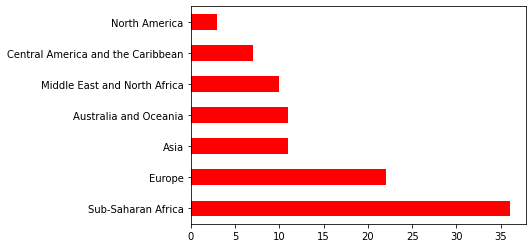

In [61]:
Df['Region'].value_counts().plot(kind='barh', color='r')

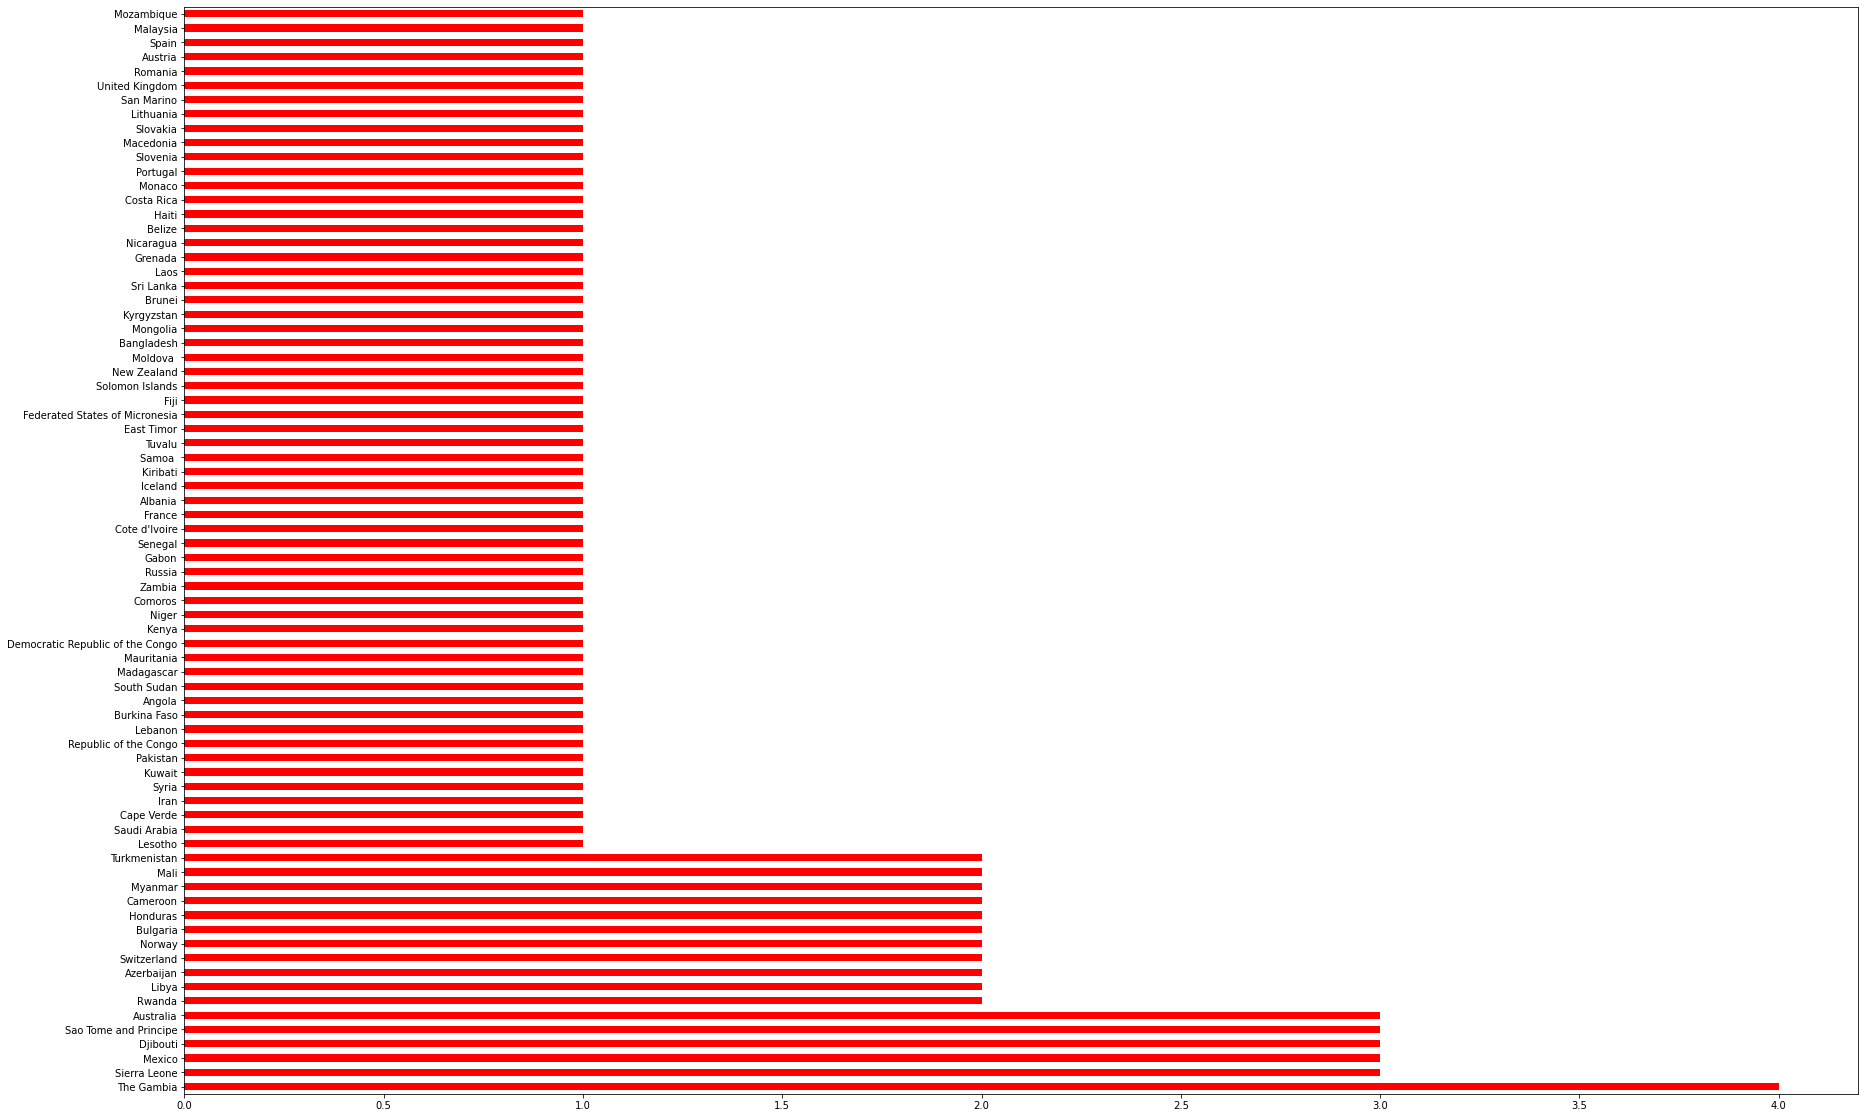

In [64]:
Df['Country'].value_counts().plot(kind='barh', color='r',figsize=(30,20))

In [ ]:
Df.sort_values(by='Units Sold', inplace=True)
Df

#<h1> 4. Pickle</h1>
When your data is not in a good, human-readable format, you can use pickle to save it in a binary format. Then you can easily reload it using the pickle library.

We will take our 100-Sales-Record CSV file and first save it in a pickle format so we can read it.

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [65]:
with open('test.pkl','wb') as f:
    pickle.dump(Df, f)

<h2>This will create a new file test.pkl which has inside it our Df from Pandas heading.</h2>

In [66]:
with open("test.pkl", "rb") as f:
    df = pickle.load(f)

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
33,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,3/1/2015,8250,668.27,502.54,5513227.50,4145955.00,1367272.50
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
18,Asia,Turkmenistan,Household,Offline,L,2010-12-30,441619336,1/20/2011,3830,668.27,502.54,2559474.10,1924728.20,634745.90
70,Asia,Turkmenistan,Office Supplies,Online,M,2013-04-23,462405812,5/20/2013,5010,651.21,524.96,3262562.10,2630049.60,632512.50
77,Asia,Laos,Vegetables,Offline,C,2011-09-15,789176547,10/23/2011,3732,154.06,90.93,574951.92,339350.76,235601.16
